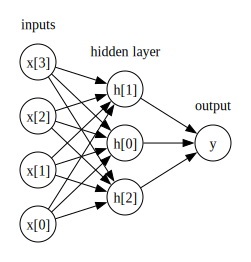

In [1]:
#인공신경망의 개요

import mglearn

# 은닉층이 1개인 인공신경망        

mglearn.plots.plot_single_hidden_layer_graph() #single

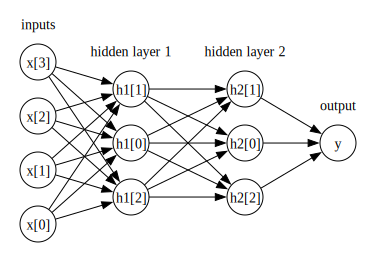

In [2]:
#은닉층이 2개인 인공신경망

mglearn.plots.plot_two_hidden_layer_graph() #hidden layer 2개

In [3]:
from sklearn.datasets import make_moons

# noise 표준편차

X, y = make_moons(n_samples=100, noise=0.25, random_state=3) # noise=0.01 정확도 100%

In [4]:
from sklearn.model_selection import train_test_split

#stratify=y :학습용 데이터와 검증용 데이터에서 각각의 타겟값들이 동일한 비율로 나타나도록 함

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.2, stratify=y, random_state=0)
                        # y 0/1 동수로

In [5]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=0,max_iter=5000).fit(X_train, y_train)
                                    # 반복횟수
#hidden_layer_sizes=(100,) , 은닉층에서 사용할 유닛수의 기본값 : 100
#데이터가 매우 적은 상태이므로 100개를 쓰는 것보다는 줄이는 것이 좋다.
#은닉유닛을 줄이면 모델의 복잡도는 낮아진다.

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.925
0.9


Text(0, 0.5, 'class 1')

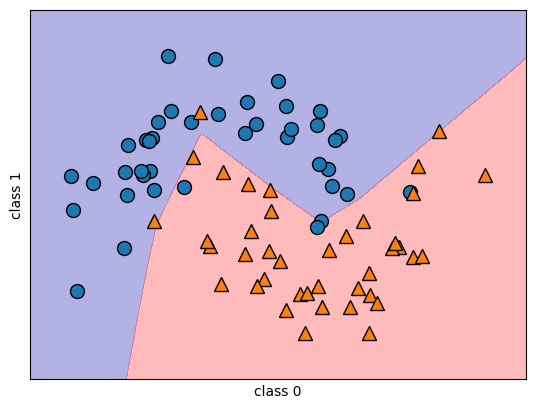

In [6]:
from matplotlib import pyplot as plt

mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("class 0")
plt.ylabel("class 1")

In [7]:
# 은닉유닛을 10개로 줄이고 테스트

model = MLPClassifier(random_state=0, hidden_layer_sizes=[10], max_iter=1000)
model.fit(X_train, y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.85
0.85


Text(0, 0.5, 'class 1')

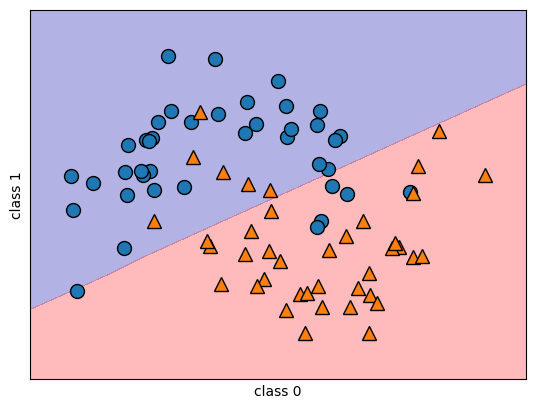

In [8]:
mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("class 0")

plt.ylabel("class 1")

In [9]:
# 10개의 유닛으로 된 두 개의 은닉층 [10,10]

model = MLPClassifier(random_state=0,hidden_layer_sizes=[10, 10], max_iter=500)

model.fit(X_train, y_train)

print(model.score(X_train,y_train))

print(model.score(X_test,y_test))

0.8375
0.85


Text(0, 0.5, 'class 1')

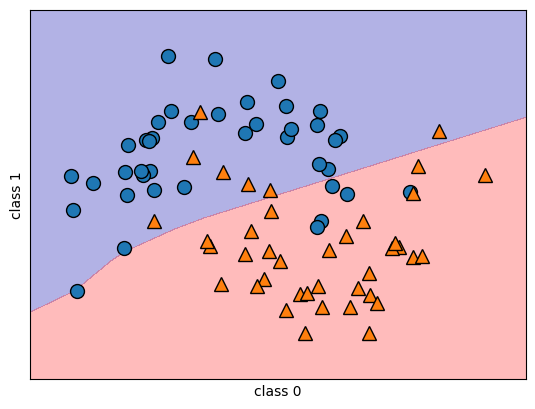

In [10]:
mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("class 0")

plt.ylabel("class 1")

1.0
1.0


Text(0, 0.5, 'class 1')

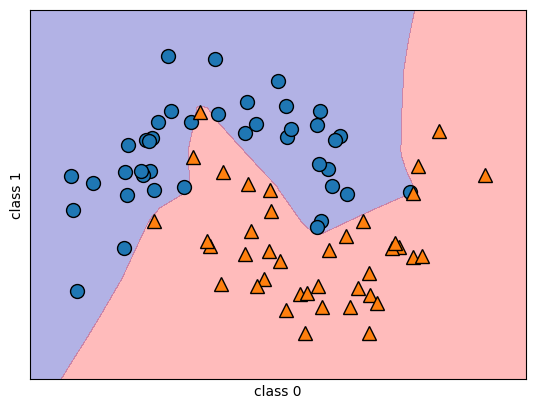

In [11]:
# 100개의 유닛으로 된 세 개의 은닉층 [100,100,100]
model = MLPClassifier(random_state=0,hidden_layer_sizes=[100,100,100], max_iter=500)

model.fit(X_train, y_train)

print(model.score(X_train,y_train))

print(model.score(X_test,y_test))

mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("class 0")

plt.ylabel("class 1")

In [12]:
from sklearn.metrics import confusion_matrix  

pred=model.predict(X_test)  

cm=confusion_matrix(y_test, pred)  

cm

array([[10,  0],
       [ 0, 10]], dtype=int64)

In [13]:
from sklearn.metrics import classification_report  

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



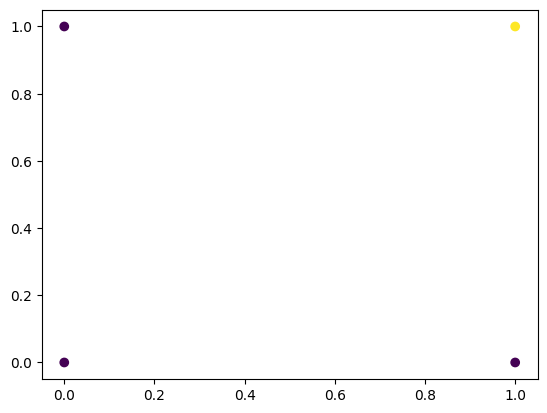

In [14]:
#퍼셉트론

import matplotlib.pyplot as plt  
import numpy as np  

X=np.array([(0,0),(0,1),(1,0),(1,1)])  
y=np.array([0,0,0,1])  

plt.scatter(X[:, 0], X[:, 1], c=y)

In [15]:
#가중치 : 각 입력 신호가 결과에 영향을 주는 중요도를 조절하는 매개변수
#편향 : 한쪽으로 치우쳐 균형을 깬다는 의미,뉴런의 활성화 정도를 조절하는 매개변수

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) #가중치 weight 기울기
    b = -0.7 #절편(편향)

    #가중치를 곱하고 절편을 더한 값
    tmp = np.sum(w*x) + b

    #둘 다 0이 입력되었는데 0이 되지 않는 것은 편향값 때문
    print(tmp)

    #0보다 작으면 0, 아니면 1을 리턴
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1])
    print(xs , " -> " , y)

-0.7
(0, 0)  ->  0
-0.19999999999999996
(1, 0)  ->  0
-0.19999999999999996
(0, 1)  ->  0
0.30000000000000004
(1, 1)  ->  1


Text(0, 0.5, 'class 1')

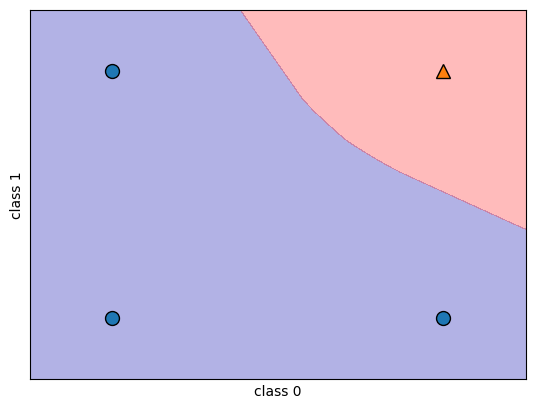

In [16]:
from sklearn.neural_network import MLPClassifier  
import mglearn 

y=[0,0,0,1]

model = MLPClassifier(random_state=0,max_iter=1000).fit(X, y)
       #multi Layer Perceptron
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=.3)  
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("class 0")  
plt.ylabel("class 1")

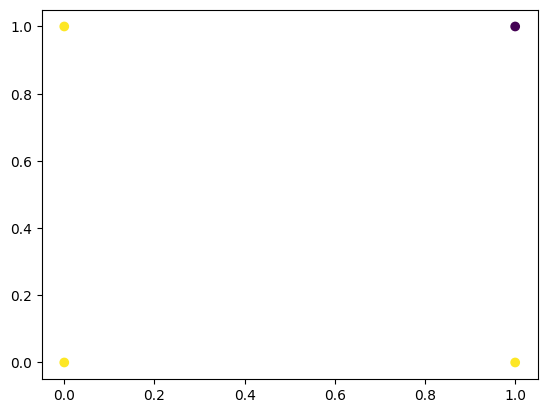

In [17]:
# NAND : AND의 역산(Not AND)

X=np.array([(0,0),(0,1),(1,0),(1,1)])
y=np.array([1,1,1,0])  
plt.scatter(X[:, 0], X[:, 1], c=y)

In [18]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) #and와 부호가 다름
    b = 0.7 #and와 부호가 다름
    tmp = np.sum(w*x) + b

    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = NAND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


Text(0, 0.5, 'class 1')

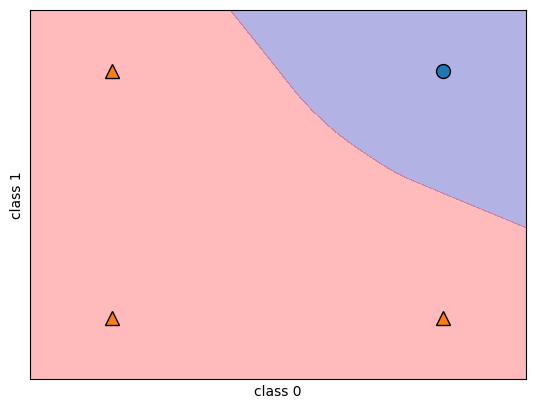

In [19]:
y=[1,1,1,0]

model = MLPClassifier(random_state=0,max_iter=1000).fit(X, y)
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("class 0")  
plt.ylabel("class 1")

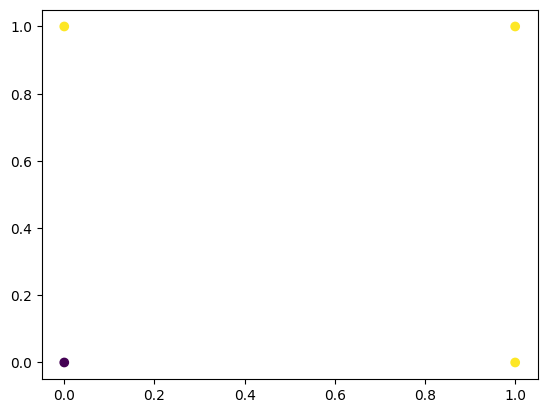

In [20]:
# OR
X=np.array([(0,0),(0,1),(1,0),(1,1)])
y=np.array([0,1,1,1])  

plt.scatter(X[:, 0], X[:, 1], c=y)

In [21]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2 #and와 값이 다름

    tmp = np.sum(w*x) + b
    print(tmp)

    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

-0.2
(0, 0) -> 0
0.3
(1, 0) -> 1
0.3
(0, 1) -> 1
0.8
(1, 1) -> 1


Text(0, 0.5, 'class 1')

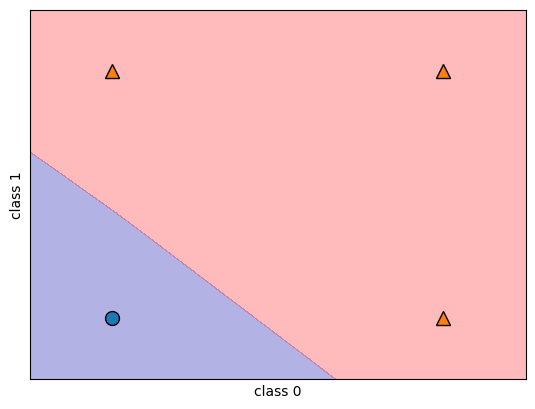

In [22]:
y=[0,1,1,1]

model = MLPClassifier(random_state=0,max_iter=1000).fit(X, y)  
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=.3)  
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)  

plt.xlabel("class 0")  
plt.ylabel("class 1")

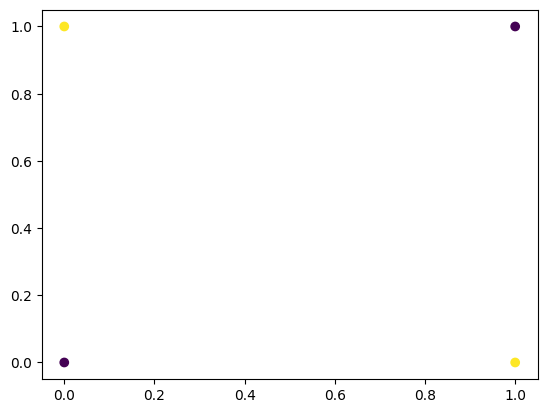

In [23]:
#단층퍼셉트론의 한계 : xor를 풀 수는 없다. 하지만 게이트를 조합하면 가능하다.
X=np.array([(0,0),(0,1),(1,0),(1,1)])
y=np.array([0,1,1,0])  
plt.scatter(X[:, 0], X[:, 1], c=y)

In [24]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

-0.2
-0.19999999999999996
(0, 0) -> 0
0.3
0.30000000000000004
(1, 0) -> 1
0.3
0.30000000000000004
(0, 1) -> 1
0.8
-0.19999999999999996
(1, 1) -> 0


Text(0, 0.5, 'class 1')

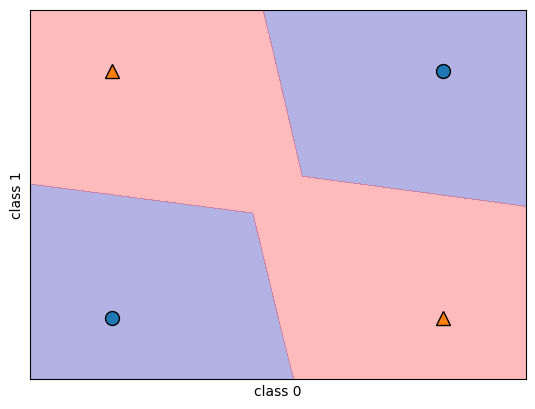

In [25]:
y=[0,1,1,0]

model = MLPClassifier(random_state=0,max_iter=1000).fit(X, y)  
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=.3)  
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("class 0")  
plt.ylabel("class 1")

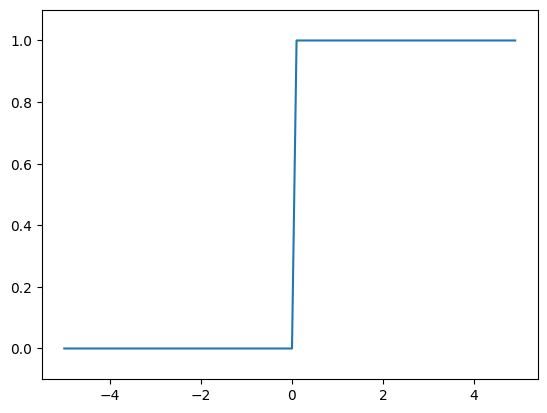

In [28]:
#활성화 함수

#계단함수(0보다 크면 1, 작으면 0)
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int32)

X = np.arange(-5.0, 5.0, 0.1)
y = step_function(X)
plt.plot(X, y)
plt.ylim(-0.1, 1.1) #y축의 범위 지정
plt.show()

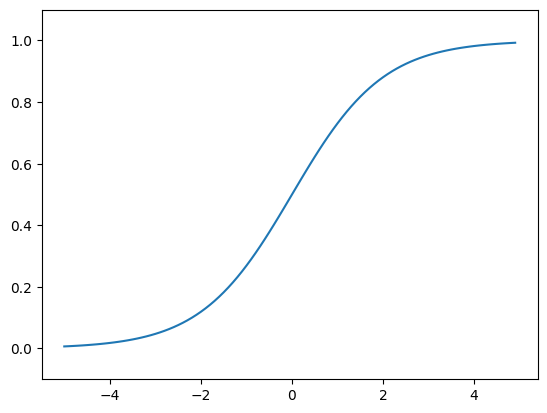

In [27]:
#시그모이드 함수: S자 모양의 함수

import numpy as np
import matplotlib.pylab as plt

#np.exp() y=e의 x승
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(X)
plt.plot(X, y)
plt.ylim(-0.1, 1.1)
plt.show()
#0,1이 아닌 연속적인 실수값을 출력함

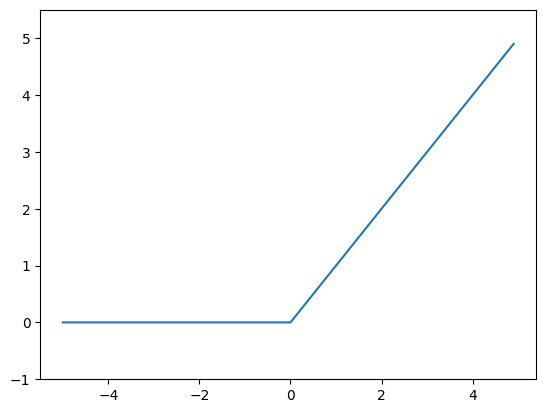

In [29]:
#ReLU 함수(Rectified Linear Unit)
# 입력이 0보다 크면 그대로 출력, 0 이하이면 0을 출력

import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

In [30]:
#오존량 예측
import pandas as pd
df = pd.read_csv("c:/data/ozone/ozone2.csv")
df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,1,190.000000,7.4,67,41,0
1,5,2,118.000000,8.0,72,36,0
2,5,3,149.000000,12.6,74,12,0
3,5,4,313.000000,11.5,62,18,0
4,5,5,185.931507,14.3,56,42,1


C:\Users\user\AppData\Local\Temp\ipykernel_17844\3795049709.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=df, palette=colors)


<Axes: xlabel='Result', ylabel='count'>

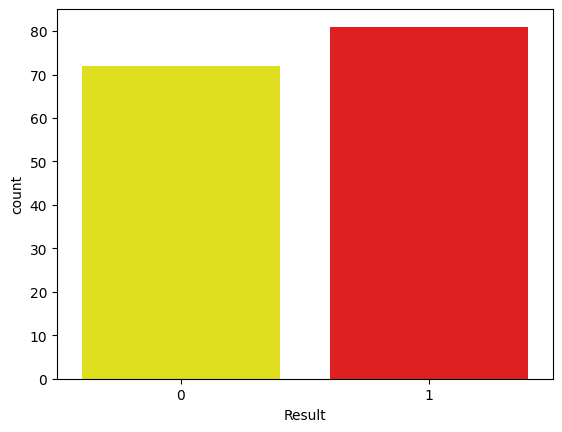

In [31]:
import seaborn as sns

import matplotlib.pyplot as plt

colors = ["yellow", "red"]

sns.countplot(x='Result', data=df, palette=colors)

#불균형 데이터셋

In [32]:
cols=['Solar.R', 'Wind', 'Temp']

X = df[cols]
y = df['Result']

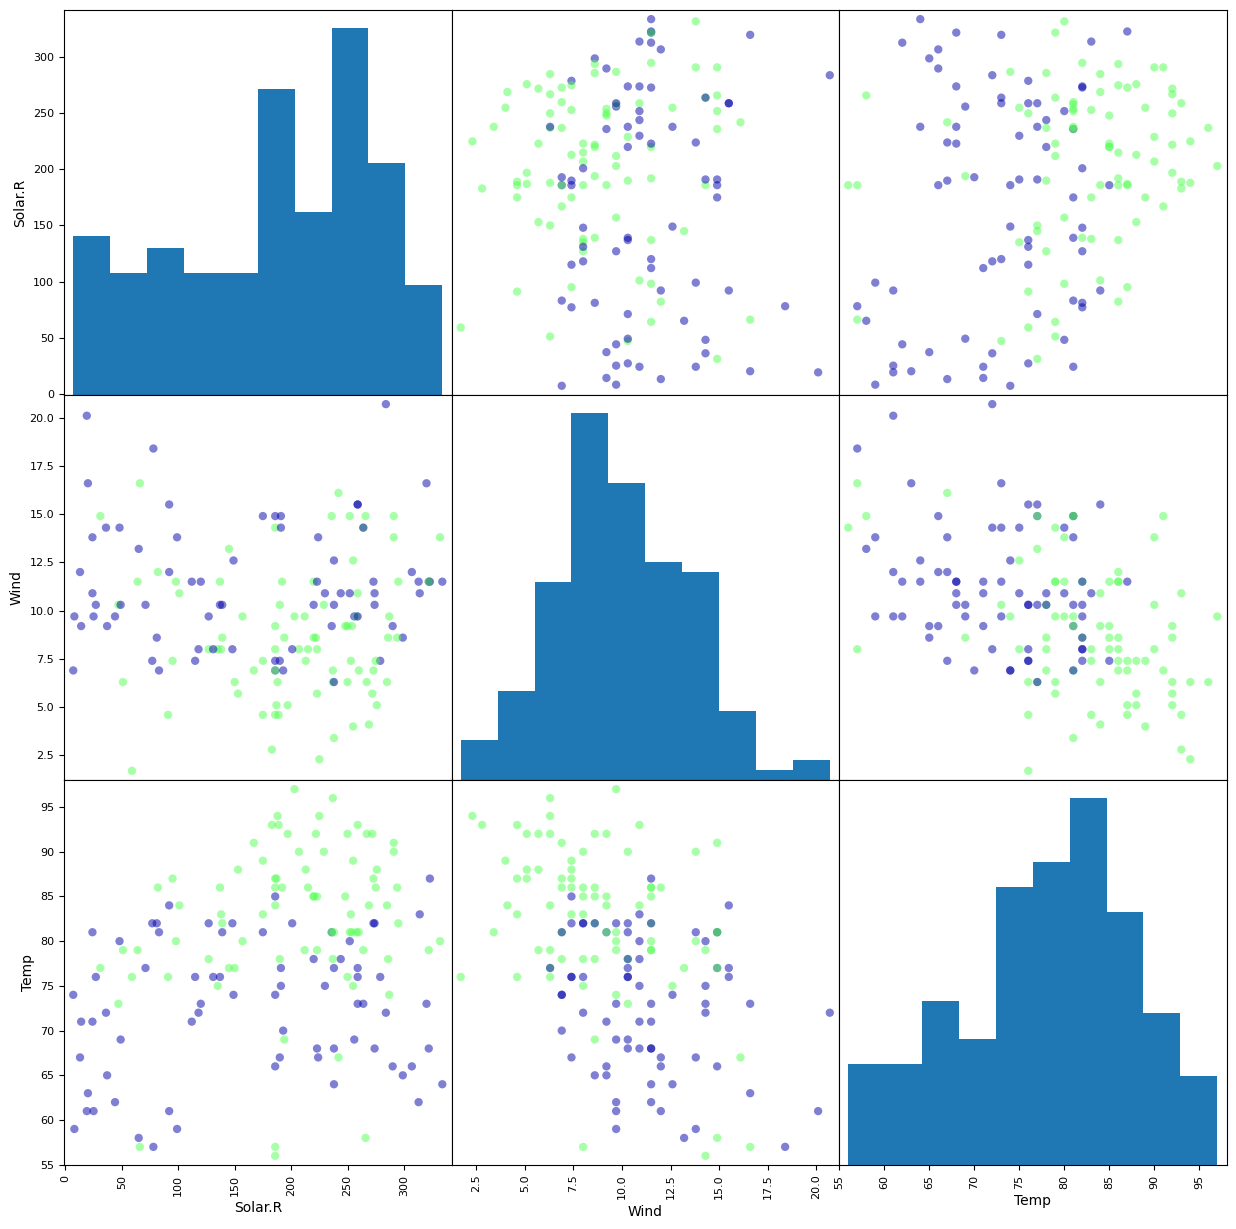

In [33]:
import mglearn
import matplotlib.pyplot as plt

#산점도 행렬 출력
pd.plotting.scatter_matrix(X, c=y, figsize=(15,15),marker='o', cmap=mglearn.cm3)
plt.show()

In [34]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["Result"].value_counts()

Result
0    72
1    72
Name: count, dtype: int64

In [35]:
X = X_samp[cols]

y = y_samp['Result']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [39]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=0)
model.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [40]:
import numpy as np

pred=model.predict(X_test)

print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))
print("검증용:",np.mean(pred == y_test))

#정확도가 떨어짐

학습용: 0.7565217391304347
검증용: 0.5862068965517241
검증용: 0.5862068965517241


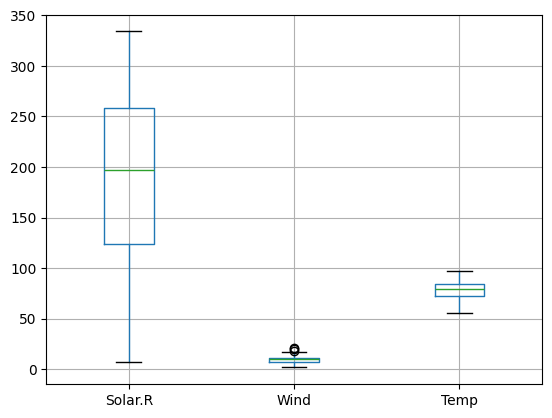

In [42]:
X_train.boxplot()

plt.show()

In [43]:
# Normalization 정규화, 모든 변수의 값이 0~1 사이의 값을 갖도록 조정
# 인공신경망,딥러닝에서 자주 사용
# 변수의 범위를 왜곡하지 않음
# (특정값-최소값)/(최대값-최소값)
# 특정 데이터가 가지는 위치를 보고 싶을 때
# (예) 전체 고객 중 체중이 가장 작은 사람이 40Kg, 가장 큰 사람이 120Kg 일 때
# 40Kg  0으로 변환
# 120Kg 1로 변환
# 80Kg  (80-40)/(120-40) = 40/80 = 0.5로 변환
# 학습용 데이터셋에서 특성별 최소값 계산
min_on_training = X_train.min(axis=0)

# 학습용 데이터셋에서 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 학습용 데이터셋에서 최소값을 빼고 범위로 나누면
# 각 특성에 대해 최소값은 0 최대값은 1로 조정됨
X_train_scaled = (X_train - min_on_training) / range_on_training

# 검증용 데이터셋에도 같은 작업을 적용
# 학습용 데이터셋에서 계산한 최소값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

print("특성별 최소값\n{0}".format(X_train_scaled.min(axis=0)))

print("특성별 최대값\n{0}".format(X_train_scaled.max(axis=0)))

특성별 최소값
Solar.R    0.0
Wind       0.0
Temp       0.0
dtype: float64
특성별 최대값
Solar.R    1.0
Wind       1.0
Temp       1.0
dtype: float64


In [44]:
# Standardization 표준화, 평균 0, 표준편차 1
# 데이터를 0을 중심으로 양쪽으로 분포시키는 방법
# 평균을 기준으로 얼마나 떨어져 있는지를 나타내는 값
# (측정값-평균) / 표준편차
# k-means, svm 등 거리 기반의 모델에서 주로 사용함
# 변수의 단위가 다른 경우 가중치가 부여되어 노이즈가 생길 수 있다
# 1000원과 1달러(가중치가 1000배가 되지 않도록 해야 함)
# 학습용 데이터셋의 변수들의 평균값 계산
mean_on_train = X_train.mean(axis=0)

# 학습용 데이터셋의 변수들의 표준편차값 계산
std_on_train = X_train.std(axis=0)

# 값에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train

# 검증용 데이터셋에도 같은 계산 적용
X_test_scaled = (X_test - mean_on_train) / std_on_train
print(X_train_scaled.describe())
print(X_test_scaled.describe())

            Solar.R          Wind          Temp
count  1.150000e+02  1.150000e+02  1.150000e+02
mean  -1.293651e-16 -2.277164e-16  4.749824e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -1.962623e+00 -2.344608e+00 -2.223487e+00
25%   -6.821378e-01 -7.421780e-01 -5.556450e-01
50%    1.257223e-01 -9.558353e-02  1.740356e-01
75%    8.016869e-01  4.104469e-01  6.952361e-01
max    1.631530e+00  2.996825e+00  2.050357e+00
         Solar.R       Wind       Temp
count  29.000000  29.000000  29.000000
mean    0.019574  -0.040327   0.138091
std     0.885968   0.901161   0.950602
min    -1.742798  -2.035367  -1.702286
25%    -0.643668  -0.742178  -0.555645
50%     0.081757   0.073093   0.069796
75%     0.642313   0.410447   0.903716
max     1.477651   1.844200   1.737637


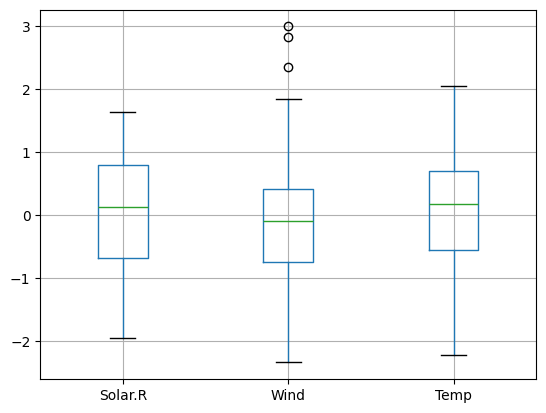

In [45]:
X_train_scaled.boxplot()

plt.show()

In [46]:
#표준화된 데이터로 다시 학습

model = MLPClassifier(random_state=0)
model.fit(X_train_scaled, y_train)

print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))

#정확도가 높아짐

학습용: 0.7478260869565218
검증용: 0.8275862068965517


c:\python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [53]:
from sklearn.metrics import confusion_matrix

pred=model.predict(X_test_scaled)
cm=confusion_matrix(y_test, pred)
cm

array([[13,  1],
       [ 4, 11]], dtype=int64)

In [54]:
df_cm=pd.DataFrame(cm, index=[0, 1],

                   columns=[0, 1])
df_cm

,0,1
0,13,1
1,4,11


<Axes: title={'center': 'Confusion Matrix'}>

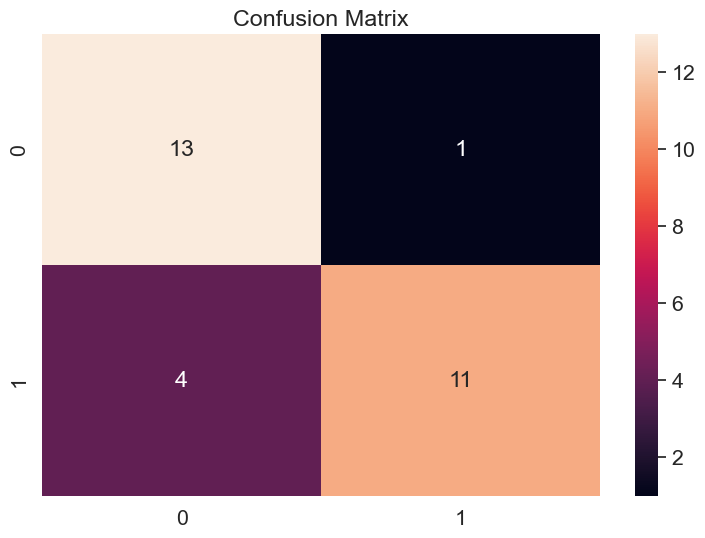

In [55]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)

In [56]:
# 대용량 데이터 학습
# 대용량 데이터를 기계학습에 사용할 경우 메모리 부족 문제가 발생할 수 있음
#   서버 용량 증설
#   학습용 데이터를 적게 설정
#   분산 처리 시스템(hadoop, spark)
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data
y = iris.target

In [94]:
# 데이터를 섞고

idx = np.arange(X.shape[0]) #0~149

np.random.seed(0)
np.random.shuffle(idx)

X = X[idx]
y = y[idx]
X

array([[-1.02184904e+00, -1.74335684e+00, -2.60315415e-01,
        -2.62386821e-01],
       [ 5.53333275e-01, -8.22569778e-01,  6.49083415e-01,
         7.90670654e-01],
       [-7.79513300e-01,  1.01900435e+00, -1.28338910e+00,
        -1.31544430e+00],
       [ 1.40150837e+00,  3.28414053e-01,  5.35408562e-01,
         2.64141916e-01],
       [-1.74885626e+00, -1.31979479e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-9.00681170e-01,  1.70959465e+00, -1.05603939e+00,
        -1.05217993e+00],
       [ 6.74501145e-01, -5.92373012e-01,  1.04694540e+00,
         1.31719939e+00],
       [ 6.86617933e-02, -1.31979479e-01,  2.51221427e-01,
         3.95774101e-01],
       [-1.26418478e+00, -1.31979479e-01, -1.34022653e+00,
        -1.18381211e+00],
       [ 2.24968346e+00, -1.31979479e-01,  1.33113254e+00,
         1.44883158e+00],
       [-9.00681170e-01,  1.47939788e+00, -1.28338910e+00,
        -1.05217993e+00],
       [-4.16009689e-01, -1.05276654e+00,  3.64896281e-01,
      

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)  

X = scaler.transform(X)

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

params = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10,10), (50,50), (100,100)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.01],
}

model = MLPClassifier(random_state=0, max_iter=5000)

clf = GridSearchCV(model, param_grid=params, cv=3)
clf.fit(X, y)

#최적의 모델 찾기
print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

0.9733333333333333
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
MLPClassifier(activation='tanh', hidden_layer_sizes=(50,), max_iter=5000,
              random_state=0)


In [60]:
from sklearn.model_selection import train_test_split

#학습용, 검증용 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
# generator
# 메모리는 절약할 수 있지만 실행시간이 더 오래 걸릴 수 있음

def make_numbers(n):
    while n < 6:
        yield n # ==> 메모리에 저장하지 않고 호출한 곳으로 값을 보냄(return과 비슷한 역할)
        n += 1
for i in make_numbers(0):
    print(i)

0
1
2
3
4
5


In [62]:
import sys

#리스트의 데이터가 늘어나면 메모리 사용량이 증가한다.    
#리스트의 모든 데이터를 메모리에 적재

a = [i for i in range(100)] #0~99
print(sys.getsizeof(a)) #메모리 바이트수

b = [i for i in range(1000)] #0~999
print(sys.getsizeof(b))

#generator expression : 위에서 언급한 generator 함수를 좀더 쉽게 사용할 수 있도록 제공되는 표현식
#[] 대신 ()을 사용하면(generator) 메모리를 효율적으로 사용할 수 있음
#모든 데이터를 메모리에 적재하지 않고 next() 함수를 통해 조금씩 메모리에 적재

c = (i for i in range(100)) #() generator 휘발성
print(sys.getsizeof(c))

d = (i for i in range(1000))
print(sys.getsizeof(d))

920
8856
192
192


In [63]:
import time

def func_sleep(x):
    print('1초 멈춤...')
    time.sleep(1)
    return x

# 리스트
items1 = [func_sleep(x) for x in range(5)] #5번 돌기 #5번 메모리

# generator 생성 ==()
items2 = (func_sleep(y) for y in range(5)) #생성기능만

1초 멈춤...
1초 멈춤...
1초 멈춤...
1초 멈춤...
1초 멈춤...


In [66]:
%%time

#리스트를 사용하면 리스트의 모든 원소를 한꺼번에 처리한 후 최종 결과가 출력됨    

for i in items1:
    print(i)

0
1
2
3
4
CPU times: total: 0 ns
Wall time: 0 ns


In [65]:
%%time

#generator를 사용하면 수행 시간이 긴 연산을 한꺼번에 수행하지 않고 조금씩 수행함  

for i in items2:
    print(i)

1초 멈춤...
0
1초 멈춤...
1
1초 멈춤...
2
1초 멈춤...
3
1초 멈춤...
4
CPU times: total: 0 ns
Wall time: 5 s


In [67]:
print('메모리 사용량:',sys.getsizeof(items1))

print('메모리 사용량:',sys.getsizeof(items2)) #메모리 최소한으로 씀

메모리 사용량: 120
메모리 사용량: 208


In [68]:
#일반적인 방식(한꺼번에 처리하는 방식)

from sklearn.metrics import accuracy_score

clf=MLPClassifier(max_iter=5000, random_state=0)

clf.fit(X_train, y_train)

pred = clf.predict(X_test)

accuracy_score(y_test, pred)

0.9666666666666667

In [70]:
#batch(X_train, y_train, 10)
#전체 데이터를 보내지 않고 10개씩 조금씩 보내서 처리하는 방식

def batch(X1, y1, n):
    x_size=len(X1)
    for idx in range(0, x_size, n):
        yield X1[idx:min(idx + n, x_size)], y1[idx:min(idx + n, x_size)]

#10개씩 12회로 나누어 처리하는 방식
clf2 = MLPClassifier(random_state=0)

#시간은 더 오래 걸릴 수 있으나 메모리를 절약할 수 있는 방법
points_tr=[]
points_te=[]
samp = batch(X_train, y_train, 10) #10개씩 나누기

for idx, (chunk_X, chunk_y) in enumerate(samp):

    print(idx)
    #부분적으로 학습, 처음에는 정확도가 낮지만 점차 향상됨

    clf2.partial_fit(chunk_X, chunk_y, classes=[0, 1, 2])
    pred = clf2.predict(X_train)
    point=accuracy_score(y_train, pred)
    points_tr.append(point)
    print('학습용:',point)

    pred = clf2.predict(X_test)
    point=accuracy_score(y_test, pred)
    points_te.append(point)
    print('검증용:',point)

0
학습용: 0.48333333333333334
검증용: 0.5
1
학습용: 0.525
검증용: 0.5333333333333333
2
학습용: 0.6416666666666667
검증용: 0.6333333333333333
3
학습용: 0.725
검증용: 0.7
4
학습용: 0.7833333333333333
검증용: 0.7333333333333333
5
학습용: 0.825
검증용: 0.7666666666666667
6
학습용: 0.8416666666666667
검증용: 0.7666666666666667
7
학습용: 0.8333333333333334
검증용: 0.8
8
학습용: 0.85
검증용: 0.8
9
학습용: 0.8583333333333333
검증용: 0.8
10
학습용: 0.8583333333333333
검증용: 0.8
11
학습용: 0.8583333333333333
검증용: 0.8


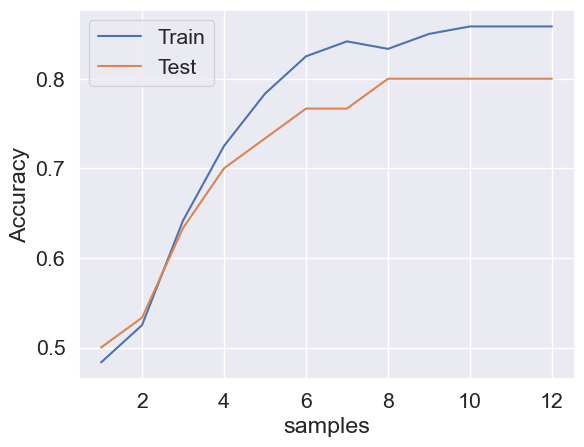

In [71]:
import matplotlib.pyplot as plt

plt.rcParams["font.size"]=15
plt.plot(range(1,13), points_tr, label="Train")
plt.plot(range(1,13), points_te, label="Test")
plt.ylabel("Accuracy")
plt.xlabel("samples")
plt.legend()

In [1]:
#와인품질 분류

import pandas as pd

df = pd.read_csv("c:/data/wine/wine_new.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0


In [2]:
df["class"].value_counts()

class
1    855
0    744
Name: count, dtype: int64

In [3]:
train_cols = df.columns[0:11]  #0~10 필드

X = df[train_cols] # 독립변수

y = df["class"]

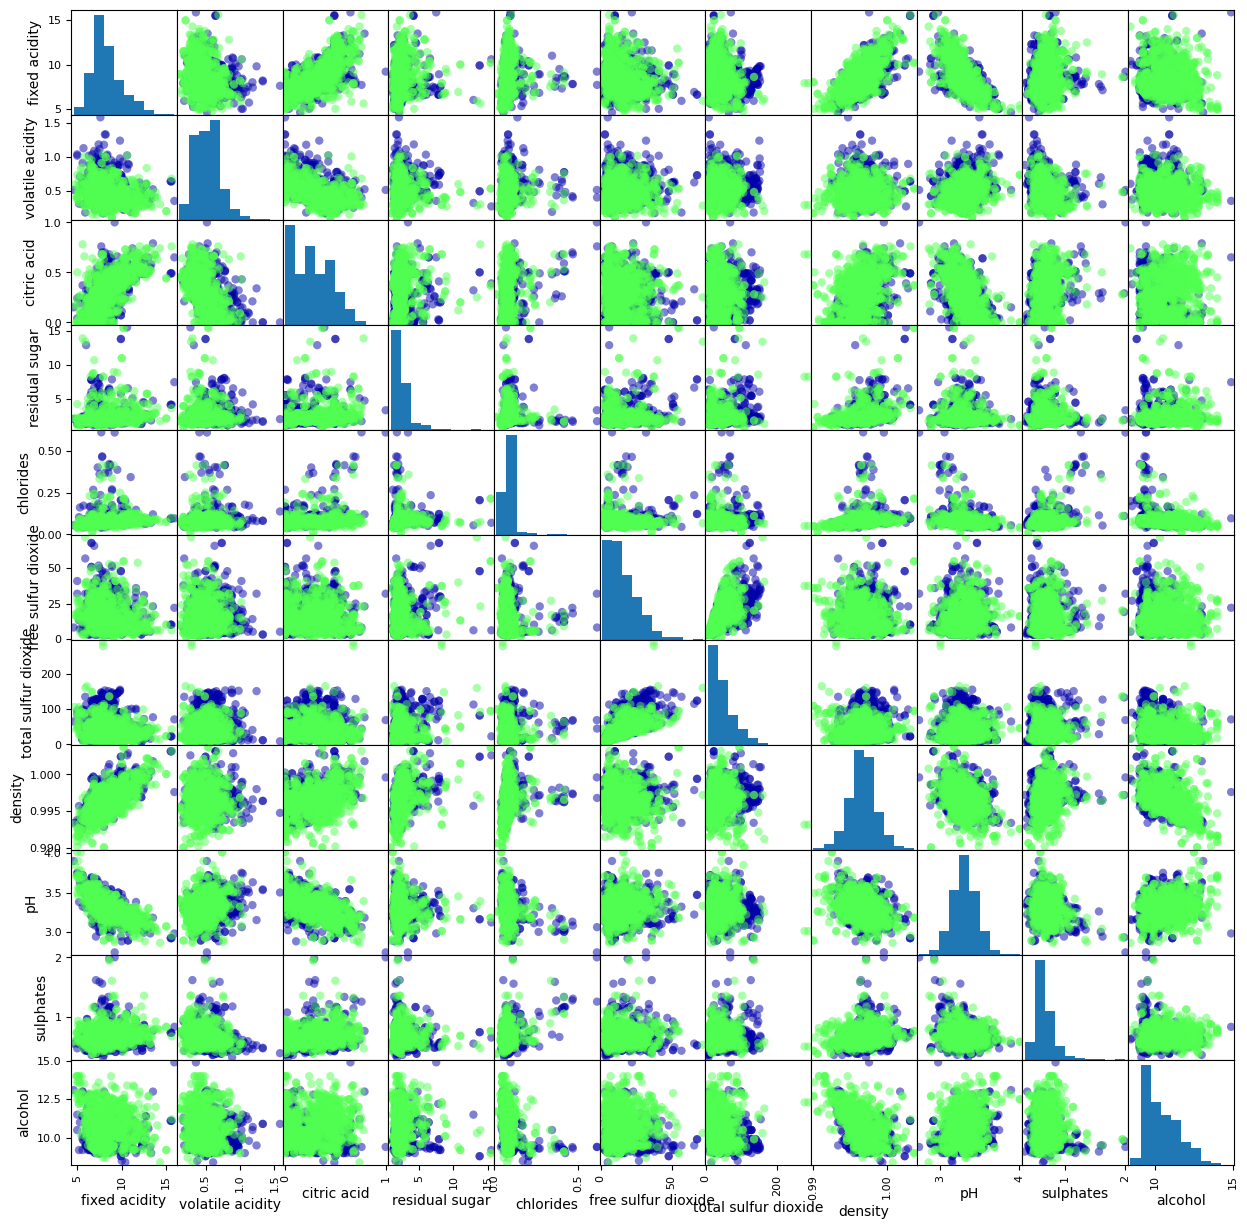

In [4]:
import mglearn

import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(X,c=y,figsize=(15,15),marker='o',cmap=mglearn.cm3)

plt.show()

In [5]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['class'])

df2=pd.concat([X_samp,y_samp],axis=1)

df2["class"].value_counts()

class
0    744
1    744
Name: count, dtype: int64

In [6]:
X = X_samp[train_cols] # 독립변수

y = y_samp["class"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [8]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=0)

model.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [9]:
import numpy as np

pred=model.predict(X_test)

print("학습용:",model.score(X_train, y_train))

print("검증용:",model.score(X_test, y_test))

print("검증용:",np.mean(pred == y_test))

학습용: 0.7445378151260504
검증용: 0.7449664429530202
검증용: 0.7449664429530202


In [10]:
# 학습용 데이터셋의 변수들의 평균값 계산
mean_on_train = X_train.mean(axis=0)

# 학습용 데이터셋의 변수들의 표준편차값 계산
std_on_train = X_train.std(axis=0)

# 값에서 평균을 빼고 표준 편차로 나누면

# 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train

# 검증용 데이터셋에도 같은 계산 적용
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [20]:
#표준화된 데이터로 다시 훈련

model = MLPClassifier(random_state=0)
model.fit(X_train_scaled, y_train)

#최대 반복 횟수에 도달했다는 경고  : max_iter 반복횟수를 늘려야 함

학습용: 0.8134453781512605
검증용: 0.7986577181208053


c:\python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))

#예측률이 향상됨

학습용: 0.8134453781512605
검증용: 0.7986577181208053


In [13]:
# 최대 반복 횟수 max_iter를 늘림

model = MLPClassifier(max_iter=1000,random_state=42)

model.fit(X_train_scaled, y_train)

print("학습용:",model.score(X_train_scaled, y_train))

print("검증용:",model.score(X_test_scaled, y_test))

#예측률이 향상됨

학습용: 0.9327731092436975
검증용: 0.825503355704698


c:\python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
# 은닉층을 2개로 늘림
model = MLPClassifier(max_iter=1000,hidden_layer_sizes=[100,100],random_state=0)
model.fit(X_train_scaled, y_train)

print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))

#예측률이 향상됨

학습용: 0.9991596638655462
검증용: 0.8187919463087249


In [15]:
# 은닉층을 3개로 늘림

model = MLPClassifier(max_iter=1000,hidden_layer_sizes=[100,100,100],random_state=0)
model.fit(X_train_scaled, y_train)

print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))

#더이상 개선되지 않음

학습용: 1.0
검증용: 0.7919463087248322


In [16]:
from sklearn.metrics import confusion_matrix

pred=model.predict(X_test_scaled)

confusion_matrix(y_test, pred)

array([[117,  30],
       [ 32, 119]], dtype=int64)

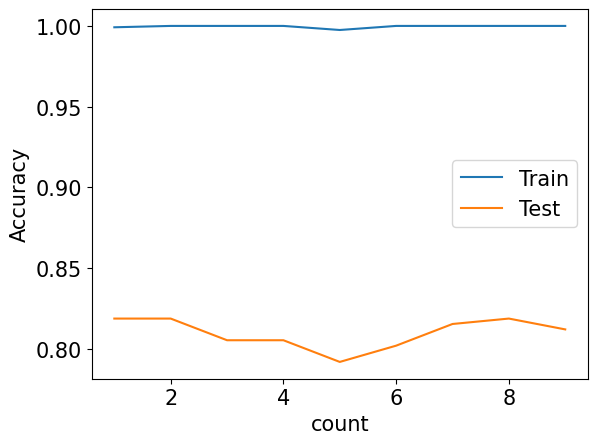

In [17]:
# 최적의 은닉노드 개수를 구하기 위한 실험

import numpy as np
import matplotlib.pyplot as plt

train_rate=[]
test_rate=[]

for i in range(100,301,100): # 첫번째 은닉층의 노드수 100~300

    for j in range(100,301,100): #두번째 은닉층의 노드수 100~300

        model=MLPClassifier(random_state=0, hidden_layer_sizes=[i,j],max_iter=1000)
        model.fit(X_train_scaled,y_train)
        train_rate.append(model.score(X_train_scaled,y_train))
        test_rate.append(model.score(X_test_scaled,y_test))        

plt.rcParams['font.size']=15
plt.plot(range(1,10),train_rate,label='Train')
plt.plot(range(1,10),test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('count')
plt.legend()

In [18]:
max_rate=max(test_rate) #최대값
idx=np.argmax(test_rate)

print('idx:',idx)
print('최고정확도:',max_rate)        

cnt=0

for i in range(100,301,100):
    for j in range(100,301,100):
        if cnt == idx:
            print(i,j)
        cnt+=1

idx: 0
최고정확도: 0.8187919463087249
100 100


In [19]:
#실험을 통해 구한 최적의 은닉노드수로 만든 모형

model=MLPClassifier(hidden_layer_sizes=[300,100],random_state=0)
model.fit(X_train_scaled,y_train)
print(f'학습용:{model.score(X_train_scaled,y_train)*100:6.2f}%')
print(f'검증용:{model.score(X_test_scaled,y_test)*100:6.2f}%')

학습용: 99.58%
검증용: 84.23%


c:\python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
